In [98]:
#imports
import pickle
import pandas as pd


In [99]:
#load apple_df_ML.pkl
apple_df_ML = pickle.load(open('apple_df_ML.pkl', 'rb'))

In [100]:
#drop index column
apple_df_ML.reset_index(drop=True, inplace=True)
apple_df_ML

#c

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,gain
0,178.235733,178.331486,178.289889,178.207933,178.179138,178.042583,177.873264,177.87247,177.994209,177.915357,...,0,0,0,0,0,0,0,0,0,1
1,181.904974,181.859539,181.845449,181.824149,181.843647,181.888155,181.881653,181.795025,181.824015,181.955434,...,0,0,0,0,0,0,0,0,0,0
2,179.322448,179.339692,179.324874,179.335482,179.35,179.340266,179.341157,179.349428,179.3425,179.334831,...,0,0,0,0,0,0,0,0,0,0
3,175.101076,175.155547,175.144149,175.103151,175.125732,175.107316,175.074358,175.068704,175.098636,175.133381,...,0,0,0,0,0,0,0,0,0,0
4,172.607027,172.646683,172.634637,172.639361,172.604653,172.581681,172.63577,172.670661,172.649364,172.650006,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,139.472937,139.666417,139.822981,139.750764,139.745796,139.693825,139.692225,139.734483,139.741705,139.668516,...,0,0,0,0,0,0,0,0,0,1
130,142.520165,142.862411,142.804697,142.754925,142.721403,142.798687,142.818407,142.80695,142.788154,142.738086,...,0,0,0,0,0,0,0,0,0,0
131,141.985858,142.114042,142.227377,142.180016,142.287812,142.215152,142.150874,142.102659,142.190929,142.238726,...,0,0,0,0,0,0,0,0,0,0
132,137.599456,137.384981,137.338305,137.509447,137.611533,137.661783,137.519065,137.529016,137.489386,137.530165,...,0,0,0,0,0,0,0,0,0,1


In [102]:
#only keep values that are not equal to 0
nan_value = float('NaN')
apple_df_ML.replace(0, nan_value, inplace=True)


In [103]:
apple_df_ML

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,gain
0,178.235733,178.331486,178.289889,178.207933,178.179138,178.042583,177.873264,177.872470,177.994209,177.915357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,181.904974,181.859539,181.845449,181.824149,181.843647,181.888155,181.881653,181.795025,181.824015,181.955434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,179.322448,179.339692,179.324874,179.335482,179.350000,179.340266,179.341157,179.349428,179.342500,179.334831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,175.101076,175.155547,175.144149,175.103151,175.125732,175.107316,175.074358,175.068704,175.098636,175.133381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,172.607027,172.646683,172.634637,172.639361,172.604653,172.581681,172.635770,172.670661,172.649364,172.650006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,139.472937,139.666417,139.822981,139.750764,139.745796,139.693825,139.692225,139.734483,139.741705,139.668516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
130,142.520165,142.862411,142.804697,142.754925,142.721403,142.798687,142.818407,142.806950,142.788154,142.738086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,141.985858,142.114042,142.227377,142.180016,142.287812,142.215152,142.150874,142.102659,142.190929,142.238726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,137.599456,137.384981,137.338305,137.509447,137.611533,137.661783,137.519065,137.529016,137.489386,137.530165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [25]:
X = apple_df_ML.drop('gain', axis=1).values
y = apple_df_ML['gain'].values
X

array([[178.235733, 178.331486, 178.289889, ..., 0, 0, 0],
       [181.904974, 181.859539, 181.845449, ..., 0, 0, 0],
       [179.322448, 179.339692, 179.324874, ..., 0, 0, 0],
       ...,
       [141.985858, 142.114042, 142.227377, ..., 0, 0, 0],
       [137.599456, 137.384981, 137.338305, ..., 0, 0, 0],
       [137.627544, 137.508483, 137.48028, ..., 0, 0, 0]], dtype=object)

In [26]:
# import the necessary modules
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(X_train)

MinMaxScaler()

In [32]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
!TF_ENABLE_ONEDNN_OPTS=0
!CUDA_VISIBLE_DEVICES=0
!TF_ENABLE_ONEDNN_OPTS=0

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [69]:
model = Sequential()

#model.add(Dense(units=1000, activation='relu'))

model.add(Dense(units=500, activation='relu'))

model.add(Dense(units=250, activation='relu'))

#model.add(Dense(units=125, activation='relu'))

#model.add(Dense(units=50, activation='relu'))

model.add(Dense(units=25, activation='relu'))

model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=4, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

#binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam')


In [71]:
#train the model
model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test), verbose=1)

Epoch 1/25
1/1 [==============================] - 1s 748ms/step - loss: 0.7120 - val_loss: 0.6919
Epoch 2/25
1/1 [==============================] - 0s 34ms/step - loss: 0.6935 - val_loss: 0.6949
Epoch 3/25
1/1 [==============================] - 0s 39ms/step - loss: 0.6936 - val_loss: 0.6981
Epoch 4/25
1/1 [==============================] - 0s 73ms/step - loss: 0.6938 - val_loss: 0.6995
Epoch 5/25
1/1 [==============================] - 0s 45ms/step - loss: 0.6934 - val_loss: 0.7014
Epoch 6/25
1/1 [==============================] - 0s 37ms/step - loss: 0.6932 - val_loss: 0.7027
Epoch 7/25
1/1 [==============================] - 0s 37ms/step - loss: 0.6926 - val_loss: 0.7037
Epoch 8/25
1/1 [==============================] - 0s 35ms/step - loss: 0.6922 - val_loss: 0.7049
Epoch 9/25
1/1 [==============================] - 0s 38ms/step - loss: 0.6917 - val_loss: 0.7065
Epoch 10/25
1/1 [==============================] - 0s 37ms/step - loss: 0.6910 - val_loss: 0.7085
Epoch 11/25
1/1 [===========

<AxesSubplot:>

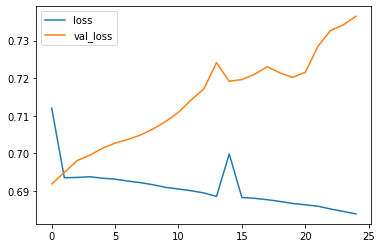

In [72]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()